## Setup

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_notebooks/includes/notebook-setup.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_notebooks/includes/notebook-setup.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

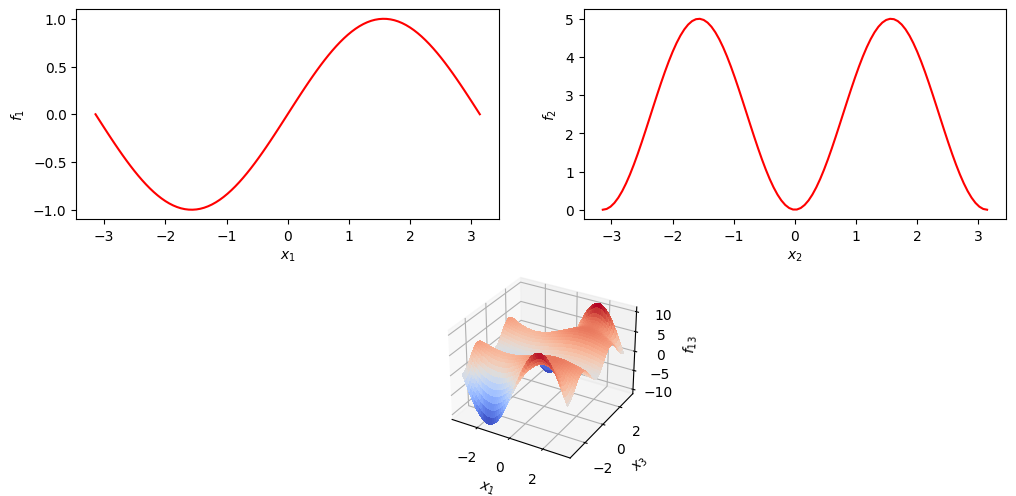

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Defining the Ishigami function explicitly
def ishigami_function(x1, x2, x3, a=5, b=0.1):
    return np.sin(x1) + a * np.sin(x2)**2 + b * (x3**4) * np.sin(x1)

variable_domain = (-np.pi, np.pi)

x_grid = np.linspace(*variable_domain, 100)

# Applying the Ishigami function to the grid values
f1 = ishigami_function(x_grid, 0, 0)
f2 = ishigami_function(0, x_grid, 0)
X, Y = np.meshgrid(x_grid, x_grid)
F13 = ishigami_function(X, Y, Y)

# Setting up the plot
fig, axs = plt.subplots(2, 2, figsize=(12, 6))  # Adjust size as needed
gs = axs[1, 1].get_gridspec()
for ax in axs[1, 0:]:
    ax.remove()
ax2 = fig.add_subplot(gs[1, 0:], projection='3d')

axs[0, 0].plot(x_grid, f1, '-r')
axs[0, 0].set_xlabel('$x_1$')
axs[0, 0].set_ylabel('$f_1$')

axs[0, 1].plot(x_grid, f2, '-r')
axs[0, 1].set_xlabel('$x_2$')
axs[0, 1].set_ylabel('$f_2$')

surf = ax2.plot_surface(X, Y, F13, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_3$')
ax2.set_zlabel('$f_{13}$')

plt.show()

### Ishigami Function

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_uq/includes/ishigami-function.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_uq/includes/ishigami-function.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The Ishigami function (Ishigami and Homma, 1989) is a well-known test
function for uncertainty and sensitivity analysis methods because of its
strong nonlinearity and peculiar dependence on $x_3$. More details of
this function can be found in (Sobol and Levitan, 1999).

Mathematically, the form of the Ishigami function is $$
g(\textbf{x}) = \sin(x_1) + a \sin^2(x_2) + b x_3^4 \sin(x_1). 
$$ We will set the parameters to be $a = 5$ and $b=0.1$ . The input
variables are sampled randomly
$x_i \sim \mathcal{U}\left(-\pi,\pi\right)$.

Next, we create the function object and visualize its shape marginally
for each one of its three inputs.

Load the Ishigami function

Text(0.5, 0, '$f_{13}$')

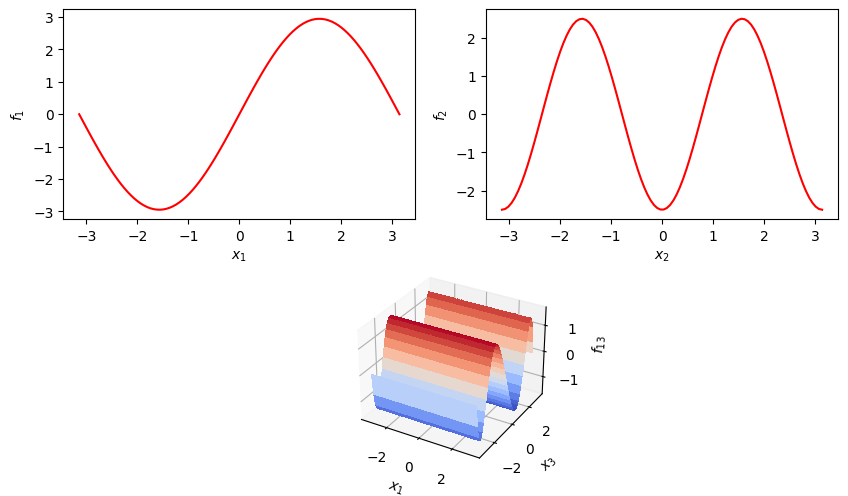

In [16]:
from emukit.test_functions.sensitivity import Ishigami
import numpy as np
from emukit.core import ContinuousParameter, ParameterSpace
from mpl_toolkits.mplot3d import Axes3D
import mlai
import mlai.plot as plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import cm
import mlai
import notutils

ishigami = Ishigami(a=5, b=0.1)

variable_domain = (-np.pi,np.pi)
           
space = ParameterSpace(
          [ContinuousParameter('x1', *variable_domain), 
           ContinuousParameter('x2', *variable_domain),
           ContinuousParameter('x3', *variable_domain)])

x_grid = np.linspace(*variable_domain,100)
f1 = ishigami.f1(x_grid)
f2 = ishigami.f2(x_grid)
F13 = ishigami.f13(np.array([x_grid,x_grid]).T)[:,np.newaxis]

fig, axs = plt.subplots(2, 2, figsize=plot.big_wide_figsize)
gs = axs[1, 1].get_gridspec()
for ax in axs[1, 0:]:
    ax.remove()

ax2 = fig.add_subplot(gs[1, 0:], projection='3d')

axs[0,0].plot(x_grid, f1,'-r')
axs[0,0].set_xlabel('$x_1$')
axs[0,0].set_ylabel('$f_1$')

axs[0,1].plot(x_grid,f2,'-r')
axs[0,1].set_xlabel('$x_2$')
axs[0,1].set_ylabel('$f_2$')

X, Y = np.meshgrid(x_grid, x_grid)
surf = ax2.plot_surface(X, Y, F13, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_3$')
ax2.set_zlabel('$f_{13}$')

In [2]:
# fig, axs = plt.subplots(2, 2, figsize=plot.big_wide_figsize)
# gs = axs[1, 1].get_gridspec()
# for ax in axs[1, 0:]:
#     ax.remove()

# ax2 = fig.add_subplot(gs[1, 0:], projection='3d')

# axs[0,0].plot(x_grid, f1,'-r')
# axs[0,0].set_xlabel('$x_1$')
# axs[0,0].set_ylabel('$f_1$')

# axs[0,1].plot(x_grid,f2,'-r')
# axs[0,1].set_xlabel('$x_2$')
# axs[0,1].set_ylabel('$f_2$')

# X, Y = np.meshgrid(x_grid, x_grid)
# surf = ax2.plot_surface(X, Y, F13, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# ax2.set_xlabel('$x_1$')
# ax2.set_ylabel('$x_3$')
# ax2.set_zlabel('$f_{13}$')

# mlai.write_figure(filename='non-zero-sobol-ishigami.svg', directory='./uq')

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//uq/non-zero-sobol-ishigami.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The non-zero components of the Ishigami function.</i>